In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [7]:
path=r'D:\Anaconda\Lib\site-packages'

In [11]:
import os
os.environ['PATH'] += ';'+path

In [6]:
pip show jupyter

Name: jupyterNote: you may need to restart the kernel to use updated packages.

Version: 1.0.0
Summary: Jupyter metapackage. Install all the Jupyter components in one go.
Home-page: http://jupyter.org
Author: Jupyter Development Team
Author-email: jupyter@googlegroups.org
License: BSD
Location: d:\anaconda\lib\site-packages
Requires: notebook, jupyter-console, ipywidgets, ipykernel, nbconvert, qtconsole
Required-by: 


In [33]:
df=pd.read_excel('BD.xlsx')

In [25]:
df

,DASS-D,DASS-A,DASS-S,DASS-T,PSS-RE,PSS-AV,PSS-AR,PSS-TT,IES-IN,IES-AV,IES-HY,IES-TT,Gender,Profession,Direct,Age
0,6,5,10,21,4,7,6,17,7,4,5,16,2,3,1,35
1,1,3,3,7,1,1,2,4,1,0,2,3,2,3,1,36
2,0,0,1,1,0,1,2,3,0,0,3,3,2,3,1,27
3,1,1,4,6,1,6,1,8,0,4,1,5,2,2,2,34
4,4,1,5,10,2,1,2,5,1,0,1,2,1,1,2,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,4,5,9,18,0,1,6,7,1,1,2,4,1,3,1,35
124,4,2,5,11,0,0,0,0,1,0,1,2,2,3,1,48
125,5,5,5,15,4,6,3,13,3,2,5,10,1,3,1,24
126,3,2,7,12,0,3,5,8,0,3,3,6,1,3,1,28


In [34]:
X,y = df.iloc[:,[12,14,13,15,0,1,2]], df['PSS-TT']

In [38]:
X=pd.get_dummies(X, columns=['Gender'])

In [35]:
X

,Gender,Direct,Profession,Age,DASS-D,DASS-A,DASS-S
0,2,1,3,35,6,5,10
1,2,1,3,36,1,3,3
2,2,1,3,27,0,0,1
3,2,2,2,34,1,1,4
4,1,2,1,33,4,1,5
...,...,...,...,...,...,...,...
123,1,1,3,35,4,5,9
124,2,1,3,48,4,2,5
125,1,1,3,24,5,5,5
126,1,1,3,28,3,2,7


In [19]:
for i in enumerate(df.columns):
    print(i)

(0, 'DASS-D')
(1, 'DASS-A')
(2, 'DASS-S')
(3, 'DASS-T')
(4, 'PSS-RE')
(5, 'PSS-AV')
(6, 'PSS-AR')
(7, 'PSS-TT')
(8, 'IES-IN')
(9, 'IES-AV')
(10, 'IES-HY')
(11, 'IES-TT')
(12, 'Gender')
(13, 'Profession')
(14, 'Direct')
(15, 'Age')


In [39]:
hui=LinearRegression(normalize=True).fit(X,y)

In [40]:
hui.coef_

array([ 2.40570731, -0.08229303,  0.00530605,  0.48900843,  0.39270694,
        0.75742118, -0.1927192 ,  0.1927192 ])

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Shortest path between [s] and [v]: s -> x -> u -> v')

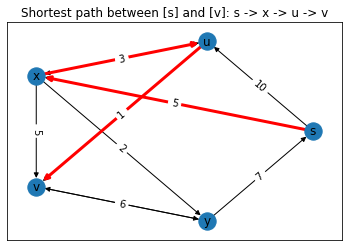

In [60]:
G = nx.DiGraph()

G.add_weighted_edges_from([
    ('s', 'u', 10), ('s', 'x', 5), ('u', 'v', 1), ('u', 'x', 2), 
    ('v', 'y', 1), ('x', 'u', 3), ('x', 'v', 5), ('x', 'y', 2), 
    ('y', 's', 7), ('y', 'v', 6)])

# расчет кратчайших путей для ВСЕХ пар вершин
predecessors, _ = nx.floyd_warshall_predecessor_and_distance(G)
# кратчайший путь от вершины [s] к вершине [v]
shortest_path_s_v = nx.reconstruct_path('s', 'v', predecessors)
# список ребер кратчайшего пути
edges = [(a,b) for a,b in zip(shortest_path_s_v, shortest_path_s_v[1:])]
# список всех весов ребер
weights = nx.get_edge_attributes(G, 'weight')
# позиции вершин для визуализации графа
#pos = nx.spring_layout(G)
pos = nx.circular_layout(G)
# рисуем граф
nx.draw_networkx(G, pos=pos)
# рисуем веса ребер
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
# рисуем кратчайший путь: [s] -> [v]
nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color="r", width=3)
# заголовок графика
title = "Shortest path between [{}] and [{}]: {}"\
        .format("s", "v", " -> ".join(shortest_path_s_v))
plt.title(title)

In [41]:
N =  [[0,5,1,1,1,1,0,0], # a
	 [0,0,1,0,1,0,0,0], # b
	 [0,0,5,10,0,0,0,0], # c
	 [1,0,2,0,1,0,0,0], # d
	 [0,0,0,0,0,1,0,0], # e
	 [3,0,1,0,0,0,1,1], # f
	 [0,4,0,0,0,1,0,1], # g
	 [0,0,0,0,0,10,1,0]] # h
N=np.array(N)

In [81]:
N=np.array(N)

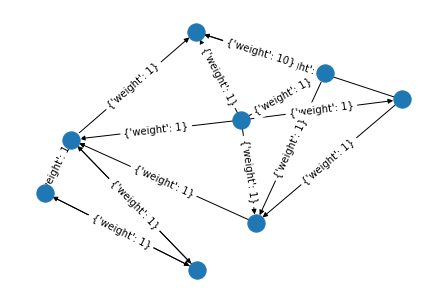

In [83]:
%matplotlib inline
G = nx.from_numpy_matrix(np.matrix(N), create_using=nx.DiGraph)
layout = nx.spring_layout(G)
nx.draw(G, layout)
nx.draw_networkx_edge_labels(G, pos=layout)
plt.show()

In [43]:
import networkx as nx
import algorithmx

G = nx.Graph()

G.add_nodes_from([1, 2, 3])
G.add_weighted_edges_from([(1, 2, 0.4), (2, 3, 0.2), (3, 1, 0.3)])

canvas = algorithmx.jupyter_canvas()

canvas.nodes(G.nodes).add()
canvas.edges(G.edges).add() \
    .label().add() \
        .text(lambda e: G.edges[e]['weight'])
algorithmx.add_graph(canvas, G)

AttributeError: module 'algorithmx' has no attribute 'add_graph'

In [3]:
pip install algorithmx

In [22]:
import algorithmx
import networkx as nx
from random import randint

canvas = algorithmx.jupyter_canvas()

# Create a directed graph
G = nx.circular_ladder_graph(5).to_directed()
# Randomize edge weights
nx.set_edge_attributes(G, {e: {'weight': randint(1, 9)} for e in G.edges})

# Add nodes
canvas.nodes(G.nodes).add()

# Add directed edges with weight labels
canvas.edges(G.edges).add().directed(True) \
    .label().text(lambda e: G.edges[e]['weight'])

display(canvas)

JupyterWidget(events=['{"attrs": {"nodes": {"0": {}, "1": {}, "2": {}, "3": {}, "4": {}, "5": {}, "6": {}, "7"…

In [135]:
N =  [[0,5,1,1,1,1,0,0], # a
	 [0,23,1,0,1,0,0,0], # b
	 [0,0,5,10,0,0,0,0], # c
	 [1,0,2,0,1,0,0,0], # d
	 [0,0,0,0,0,1,0,0], # e
	 [3,0,1,0,0,0,1,1], # f
	 [0,4,0,0,0,1,0,1], # g
	 [0,0,0,0,0,10,1,0]] # h
N=np.array(N)

canvas = algorithmx.jupyter_canvas()


G = nx.from_numpy_matrix(np.matrix(N), create_using=nx.DiGraph)

mapping = {0: "aasdsadasdas", 1: "bsadasdasdas", 2: "c", 3:'ddasdasdasdsa', 4:'esadasdasdsa', 5:'fsadsadas', 6:'g',7:'h'}
nx.relabel_nodes(G, mapping, copy=False)

for node, edge in zip(G.nodes, G.edges):
    canvas.node(node).color('red').shape('rect')
canvas.node('g').label().size(5).color('black')

canvas.size((500,1000))


add_graph(canvas, G)

JupyterWidget(events=['{"attrs": {"nodes": {"aasdsadasdas": {"color": "red"}}}}', '{"attrs": {"nodes": {"aasds…

In [87]:
for node, edge in zip(G.nodes, G.edges):
    print(node, edge)

aasdsadasdas ('aasdsadasdas', 'bsadasdasdas')
bsadasdasdas ('aasdsadasdas', 'c')
c ('aasdsadasdas', 'ddasdasdasdsa')
ddasdasdasdsa ('aasdsadasdas', 'esadasdasdsa')
esadasdasdsa ('aasdsadasdas', 'fsadsadas')
fsadsadas ('bsadasdasdas', 'bsadasdasdas')
g ('bsadasdasdas', 'c')
h ('bsadasdasdas', 'esadasdasdsa')


In [120]:
canvas = algorithmx.jupyter_canvas(buttons=True)
canvas.size((300, 200))
canvas.nodes([1, 2]).add()
canvas.edge((1, 2)).add()
canvas.pause(0.5)
canvas.node(1).highlight().size('1.25x').pause(0.5)
canvas.edge((1, 2)).traverse(color='blue')
canvas

JupyterWidget(events=['{"attrs": {"size": [300, 200]}}', '{"attrs": {"nodes": {"1": {}, "2": {}}}}', '{"attrs"…

<IPython.core.display.Javascript object>


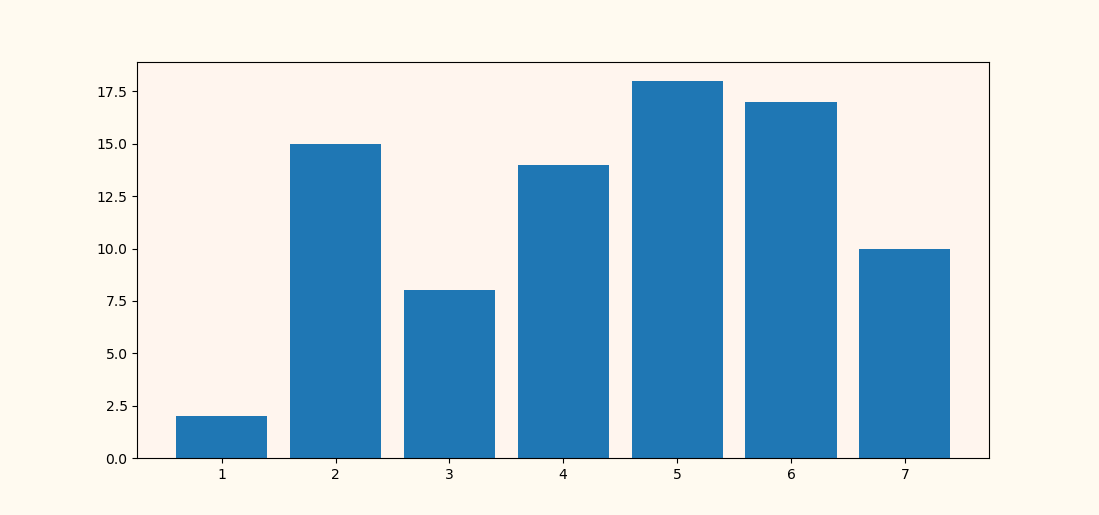

In [4]:
import matplotlib.pyplot as plt

%matplotlib notebook
x = np.arange(1, 8)
y = np.random.randint(1, 20, size = 7)

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
plt.show()